In [1]:
# Dataset: Mall_Customers.csv

# Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Read the data

In [5]:
df= pd.read_csv('Mall_Customers.csv')

In [6]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.shape

(200, 5)

In [8]:
# Separate the input variable

In [9]:
x = df.iloc[:,[3,4]]

In [10]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [11]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Explore the data

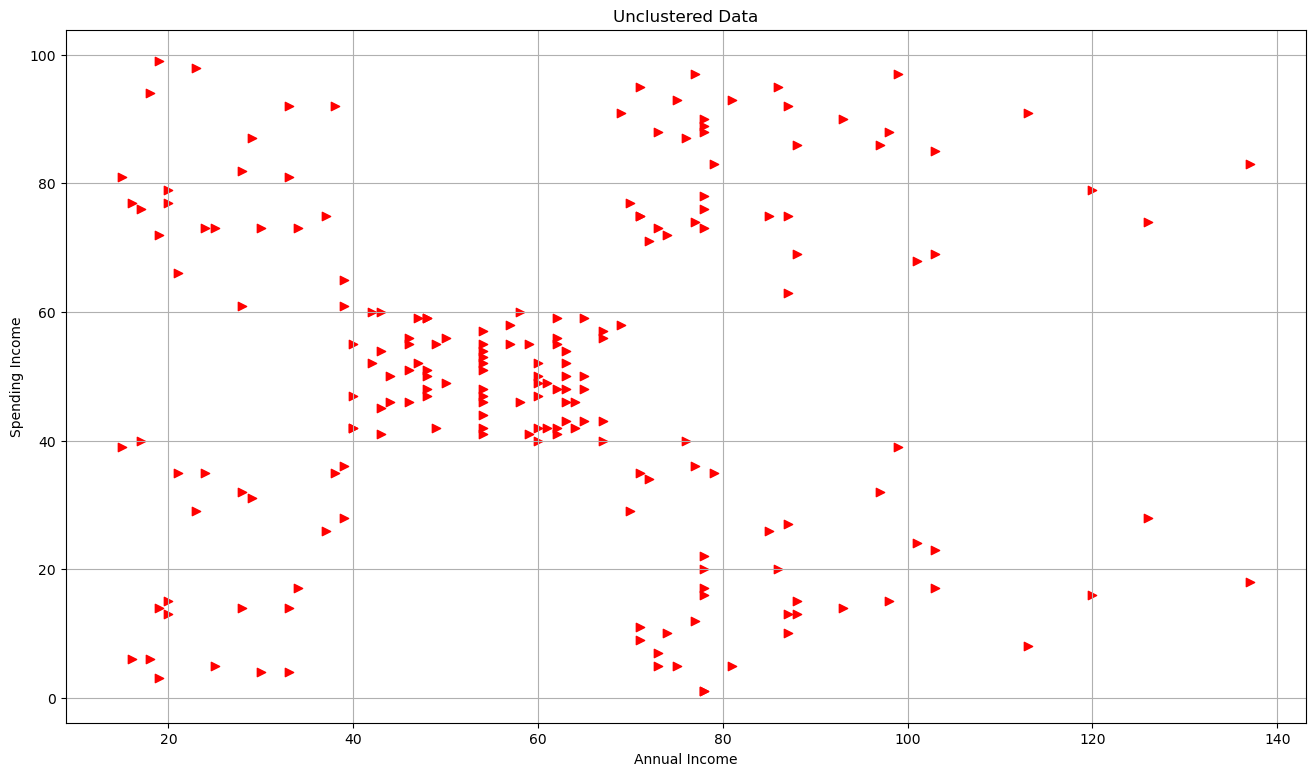

In [12]:
plt.figure(figsize=(16,9))
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Income')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'red', marker='>')

# Elbow Method

In [13]:
from sklearn. cluster import KMeans

In [14]:
km = KMeans(random_state=0, n_clusters=5,n_init='auto')

In [15]:
y =km.fit_predict(x)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [17]:
km.inertia_

44448.45544793371

In [18]:
sse = []
for k in range(1, 16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(x)
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [19]:
sse

[269981.28,
 186362.95600651758,
 106348.3730621112,
 73880.64496247195,
 44448.45544793371,
 37265.86520484346,
 31648.556137745232,
 31858.34437229437,
 26629.993500201344,
 25612.530534984333,
 19027.227817593033,
 16988.412448328614,
 15491.015803306966,
 14297.307469973637,
 12971.364965986395]

In [22]:
cents =km.cluster_centers_
cents

array([[ 93.4       ,  16.4       ],
       [ 60.26530612,  49.2244898 ],
       [ 25.88888889,  32.77777778],
       [ 75.90909091,  90.36363636],
       [ 24.95      ,  81.        ],
       [ 24.58333333,   9.58333333],
       [124.        ,  81.75      ],
       [ 93.875     ,  89.875     ],
       [ 43.94444444,  56.72222222],
       [ 44.        ,  44.4       ],
       [124.        ,  17.5       ],
       [ 75.76923077,   9.15384615],
       [ 93.2       ,  68.8       ],
       [ 75.18181818,  74.45454545],
       [ 81.        ,  32.27272727]])

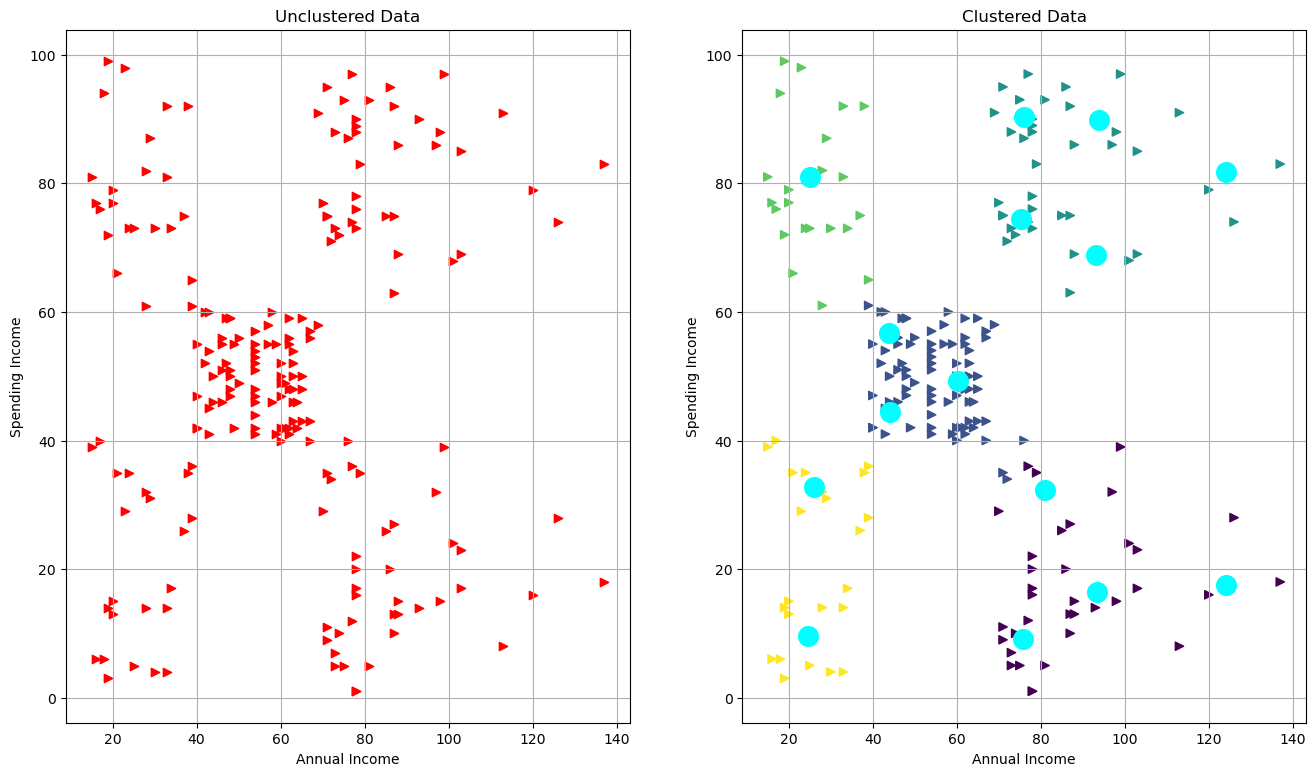

In [23]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Income')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'red', marker='>')


plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Income')
plt.scatter(x.iloc[:,0], x.iloc[:,1], marker='>', c=y)
plt.scatter(cents[:,0], cents[:,1], s=200, color='cyan')

# Extract the clusters

In [26]:
zero = df[y==0]
one = df[y==1]
two = df[y==2]
three = df[y==3]
four = df[y==4]

In [28]:
print('Cluster-0: ', len(zero))
print('Cluster-1: ', len(one))
print('Cluster-2: ', len(two)) 
print('Cluster-3: ', len(three))
print('Cluster-4: ', len(four))      

Cluster-0:  35
Cluster-1:  81
Cluster-2:  39
Cluster-3:  22
Cluster-4:  23


#### Save the clusters

In [29]:
zero.to_csv('zero.csv', index=True)

#### Predict the new data

In [34]:
new = pd.DataFrame([[34,17],[56,10],[104,45],[98,88],[34,17]], columns=x.columns)

In [35]:
new

,Annual Income (k$),Spending Score (1-100)
0,34,17
1,56,10
2,104,45
3,98,88
4,34,17


In [36]:
km.predict(new)

array([ 5, 11, 12,  7,  5])

In [37]:
x['Cluster'] =y

C:\Users\jaypa\AppData\Local\Temp\ipykernel_25916\4072497591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster'] =y


In [38]:
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


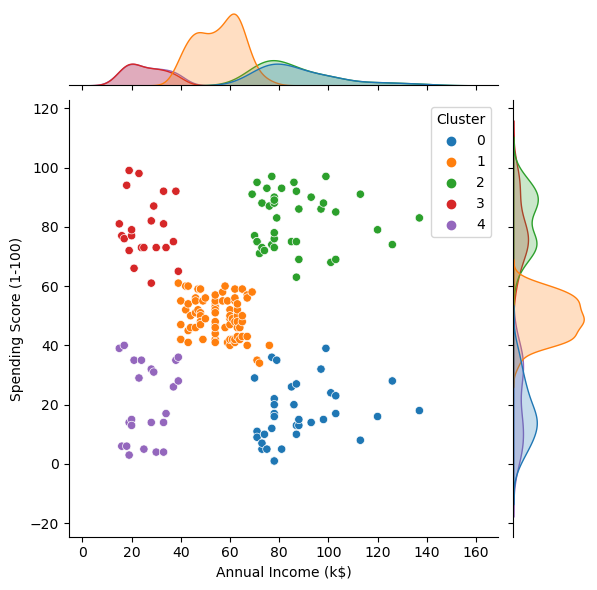

In [42]:
sns.jointplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
             data = x, hue='Cluster', palette='tab10')

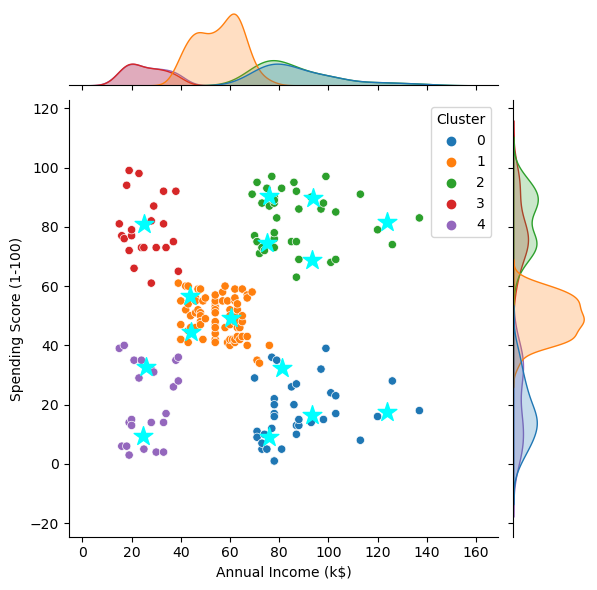

In [43]:
sns.jointplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
             data = x, hue='Cluster', palette='tab10')
plt.scatter(cents[:,0], cents[:,1], s=200, color='cyan' , marker='*')

In [44]:
!pip install nltk textblob -U

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.5/1.5 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 626.3/626.3 kB 4.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
